# Feature Importance Score by Random Forest

In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
data=pd.read_excel("C:/Users/VINITA/Desktop/HMF.xlsx")

In [29]:
data.head()

,Sl_No.,Fund_Scheme_Name,Category,Launch_Date,Crisil_Rating,Net_Assets_(Cr),1_Yr_Return,3_Yr_Return,5_Yr_Return,Risk,Expense_Ratio,Sharpe_Ratio,Sortino_Ratio,Alpha,Beta,Std_Dev,R_Squared,Year_Trailing,Net_Return,Good
0,1,UTI Arbitrage Fund #,Arbitrage,2006-06-29,Rank 1,1397.70,6.52,6.24,6.60,Moderately Low,0.83,-0.03,-0.04,0.60,0.33,0.45,0.00,13,7.40,0
1,2,LIC MF Debt Hybrid Fund #,Conservative,2003-06-02,Rank 1,84.93,7.68,5.92,6.55,Moderate,2.30,-0.08,-0.12,-1.91,0.58,3.07,62.19,16,7.73,0
2,3,ICICI Prudential Regular Savings Fund #,Conservative,2004-03-30,Rank 1,1589.42,8.40,9.33,9.92,Moderately High,2.24,0.84,1.36,1.91,1.58,3.57,88.45,15,10.06,1
3,4,Reliance Arbitrage Fund #,Arbitrage,2010-10-14,Rank 2,8535.00,6.64,6.41,6.86,Moderately Low,1.04,0.26,0.45,0.70,1.30,0.54,85.00,8,17.83,1
4,5,Kotak Equity Arbitrage Fund #,Arbitrage,2005-09-29,Rank 2,13360.00,6.56,6.32,6.75,Moderately Low,0.97,0.14,0.23,0.56,1.26,0.45,87.45,13,18.45,1


In [30]:
X=data[['R_Squared', 'Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev', 'Expense_Ratio', 'Sortino_Ratio']]
y=data['Good']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% data for training purpose & 20% for testing purpose.

In [32]:
from sklearn.ensemble import RandomForestClassifier # using random forest train, test and generate accuracy

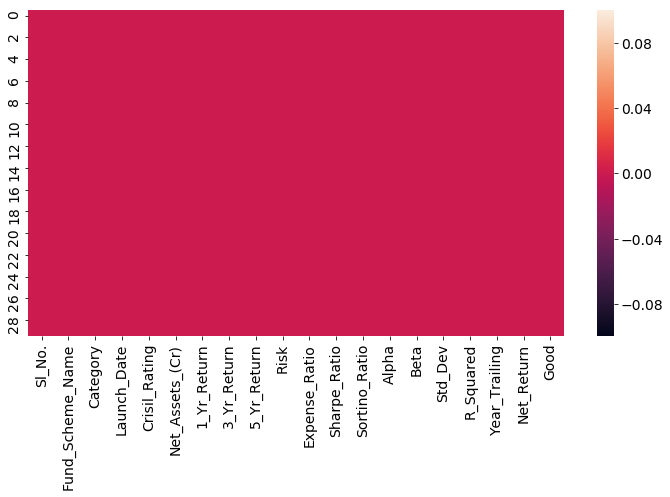

In [33]:
sb.heatmap(data.isnull())

In [49]:

#def recode_empty_cells(data, list_of_columns):

#    for column in list_of_columns:
#        data[column] = data[column].replace(r'\s+', np.nan, regex=True)
#        data[column] = data[column].fillna(0)
    
#    return data

#list_of_columns = ['5_Yr_Return','Expense_Ratio','R_Squared']
#recode_empty_cells(data, list_of_columns)


In [35]:
#data.to_excel("C:/Users/VINITA/Desktop/HMF.xlsx")

In [36]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

# ROC curve with Random Forest Model

In [37]:
from sklearn.metrics import roc_curve
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [38]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.833


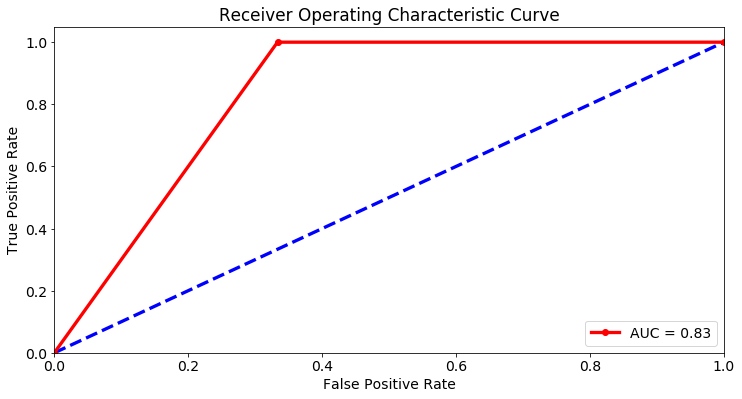

In [39]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', linewidth='3.3')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='o', color='red', label = 'AUC = %0.2f' % auc, linewidth='3.3')
# show the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['font.size'] = 14
plt.show()

**AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.**

# Accuracy in Random Forest

In [40]:
from sklearn import metrics

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


# Confusion Matrix in Random Forest

In [42]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test, y_pred))
print ('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[2 1]
 [0 3]]
Accuracy Score : 0.8333333333333334
Report : 
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

   micro avg       0.83      0.83      0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [43]:
#sb.heatmap(results, annot=True, annot_kws={"size": 16})

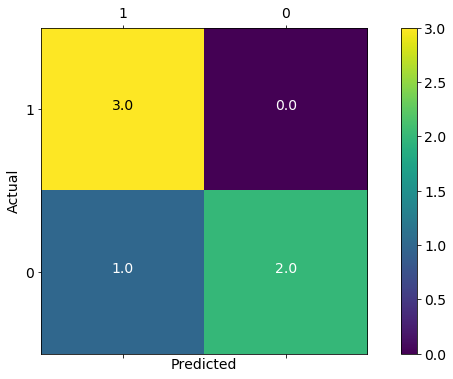

In [44]:
from sklearn.metrics import confusion_matrix
import itertools
labels = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
#plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)

thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:0.1f}".format(cm[i, j]), horizontalalignment="center", color="black" if cm[i, j] > thresh else "white")
    
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature Importance by Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
feature_imp = pd.Series(clf.feature_importances_,index=['R_Squared', 'Net_Return', 'Beta', 'Alpha', 'Sharpe_Ratio', 'Std_Dev', 'Expense_Ratio', 'Sortino_Ratio']).sort_values(ascending=False)
feature_imp

Beta             0.244486
Net_Return       0.243470
R_Squared        0.234252
Alpha            0.097835
Sortino_Ratio    0.057357
Sharpe_Ratio     0.054257
Expense_Ratio    0.034194
Std_Dev          0.034150
dtype: float64

No handles with labels found to put in legend.


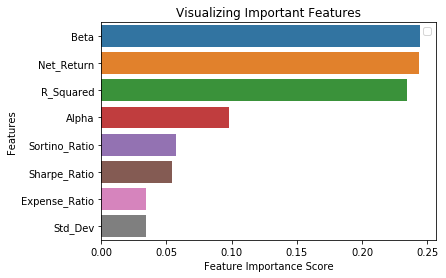

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [21]:
import pickle
filename=r'C:\Users\VINITA\Desktop\clf.sav'
pickle.dump(clf,open(filename,'wb'))